In [1]:
import numpy as np, prjlib, binning as bins, plottools as pl
from matplotlib.pyplot import *

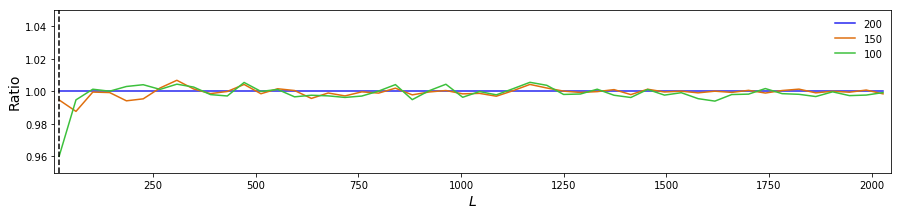

In [2]:
# narrow binning
p, f = prjlib.filename_init(doreal='False',stype='lcmb',ver='v1')
mb = bins.multipole_binning(50,spc='',lmin=1)
pl.plot_1dstyle(ylab=r'Ratio',fsize=[15,3],xmin=10,xmax=2048,ymin=.95,ymax=1.05)
for si, s in enumerate([200,150,100]):
    f = p.quad.f['EB'].n0bs.replace('_n100.dat','_simn'+str(s).zfill(3)+'.dat')
    n0b = np.loadtxt(f,unpack=True)[1]
    nb = bins.binning(n0b,mb)
    if si==0: nb0=nb
    plot(mb.bc,nb/nb0,label=str(s))
axvline(20,color='k',ls='--')
legend(loc=0,frameon=False)
#savefig('fig_n0.png')

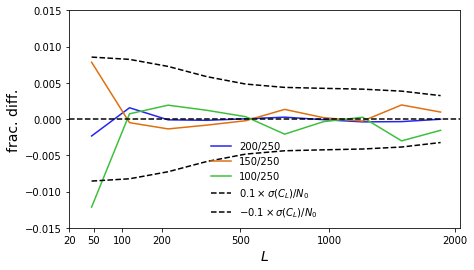

In [3]:
# binned spectrum
p, f = prjlib.filename_init(doreal='True',dearot='True',stype='lcmb',ver='v1')
mb = bins.multipole_binning(10,lmin=20,lmax=2048,spc='p2')
pl.plot_1dstyle(ylab=r'frac. diff.',fsize=[7,4],spc='p2',xmin=20,xmax=2048,ymin=-.015,ymax=0.015)
scb = prjlib.binned_cl_rlz(p.quad.f['EB'].cl,1,200,mb)
vcb = np.std(scb)
n00 = prjlib.binned_cl(p.quad.f['EB'].n0bs.replace('_n100','_n250'),mb)
n01 = prjlib.binned_cl(p.quad.f['EB'].n0bs.replace('_n100','_n200'),mb)
n02 = prjlib.binned_cl(p.quad.f['EB'].n0bs.replace('_n100','_n150'),mb)
n03 = prjlib.binned_cl(p.quad.f['EB'].n0bs,mb)
plot(np.sqrt(mb.bc),n01/n00-1,label='200/250')
plot(np.sqrt(mb.bc),n02/n00-1,label='150/250')
plot(np.sqrt(mb.bc),n03/n00-1,label='100/250')
plot(np.sqrt(mb.bc),vcb/n00/10.,color='k',ls='--',label=r'$0.1\times\sigma(C_L)/N_0$')
plot(np.sqrt(mb.bc),-vcb/n00/10.,color='k',ls='--',label=r'$-0.1\times\sigma(C_L)/N_0$')
axhline(0,color='k',ls='--')
legend(loc=0,frameon=False)